<a href="https://colab.research.google.com/github/nhatminh-it/CS114.K21/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT TIME TO RUN FROM SIZE DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Load, check, handing data**

Lấy dữ liệu xuống thế nào?
Sử dụng thư viện pandas để đọc file

In [0]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names =['size', 'time'] )

In [3]:
dataset.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [0]:
#Tăng feature để tăng khả năng dự đoán
dataset['size**2']=dataset['size']*dataset['size']
dataset['size.log(size)']=dataset['size']*np.log10(dataset['size'])
columns_titles = ["size","size**2","size.log(size)","time"]
dataset=dataset.reindex(columns=columns_titles)

In [5]:
dataset.head()

,size,size**2,size.log(size),time
0,6083695,37011344853025,4.127281e+07,0.521842
1,1954367,3819550370689,1.229493e+07,0.152648
2,3734185,13944137614225,2.454180e+07,0.298548
3,5839301,34097436168601,3.951082e+07,0.460480
4,6343427,40239066104329,4.315005e+07,0.527977


In [6]:
dataset.describe()

,size,size**2,size.log(size),time
count,7.111500e+04,7.111500e+04,7.111500e+04,71115.000000
mean,4.998766e+06,3.329704e+13,3.390470e+07,0.406785
std,2.882618e+06,2.974139e+13,2.038959e+07,0.244039
min,2.550000e+02,6.502500e+04,6.136677e+02,0.000009
25%,2.496521e+06,6.232617e+12,1.597108e+07,0.192746
50%,5.010144e+06,2.510154e+13,3.356721e+07,0.403410
75%,7.481742e+06,5.597647e+13,5.142952e+07,0.616155
max,9.999882e+06,9.999764e+13,6.999912e+07,0.983776


#### **Data visualization**

<Figure size 576x576 with 0 Axes>

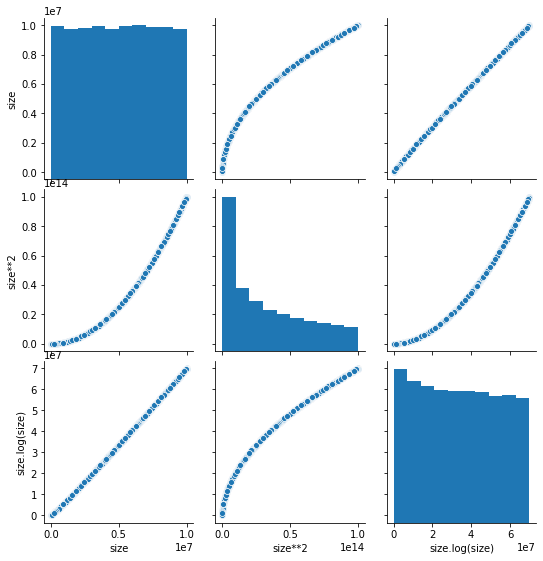

In [7]:
plt.figure(figsize=(8,8))
features = dataset.columns[:-1]
sns.pairplot(dataset[features],palette='coolwarm')
plt.show()

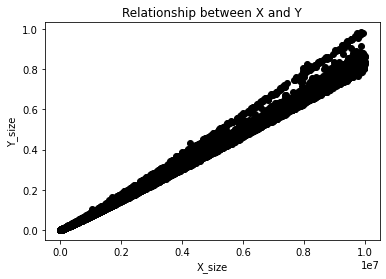

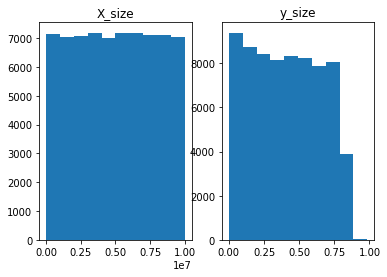

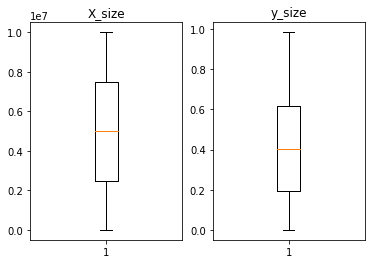

In [8]:
X_size = dataset['size']
y_size = dataset['time']
plt.title('Relationship between X and Y')
plt.scatter(X_size, y_size,  color='black')
plt.xlabel('X_size')
plt.ylabel('Y_size')
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.hist(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.hist(y_size)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.boxplot(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.boxplot(y_size)
plt.show()

#### **Evaluate Some Algorithms**

Chọn model và train thế nào? 

1.   Đánh giá một vài model
2.   Chọn model tốt nhất để train



In [0]:
# Chia data
X = dataset.iloc[:,0:3]
y = dataset.iloc[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
# Đánh giá một số model
models = []
models.append(('LR :', LinearRegression())) #Linear Regression
models.append(('SVR:', SVR())) #Support Vector Regression
models.append(('DTR:', DecisionTreeRegressor(random_state=1))) #Decision Tree Regression
models.append(('RFR:', RandomForestRegressor(n_estimators = 10, random_state=1))) #Random Forest Regression
# Evaluate each model in turn
names = []
for name, model in models:
  model.fit(X_train,Y_train)
  y_predict = model.predict(X_validation)
  results = mean_absolute_error(Y_validation,y_predict)
  print(name,results)

LR : 0.006896127387182563
SVR: 0.04383453054579132
DTR: 0.009801152281957671
RFR: 0.008554692972547734


#### **Linear Regression is the best model**
Make predictions on validation dataset

Viết ứng dụng thực hiện việc predict cho một mẫu dữ liệu mới thế nào?

*   Tạo ra 1 mẫu dữ liệu mới bằng biến test
*   Cho test vô model để dự đoán



In [11]:
test = [[4032139, 16258144915321, 2.663444e+07]]
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)
y = LR_model.predict(test)
y

array([0.32020196])

Khả năng dự đoán của ứng dụng là tốt hay không? Làm sao biết?

*   Khả năng dự đoán của model là tốt
*   Ở bước đánh giá model đã đánh giá giá trị mean absolute error của model linear regression là rất thấp ~ 0.007

